now visualizing scatterlplot...
scatterplot done


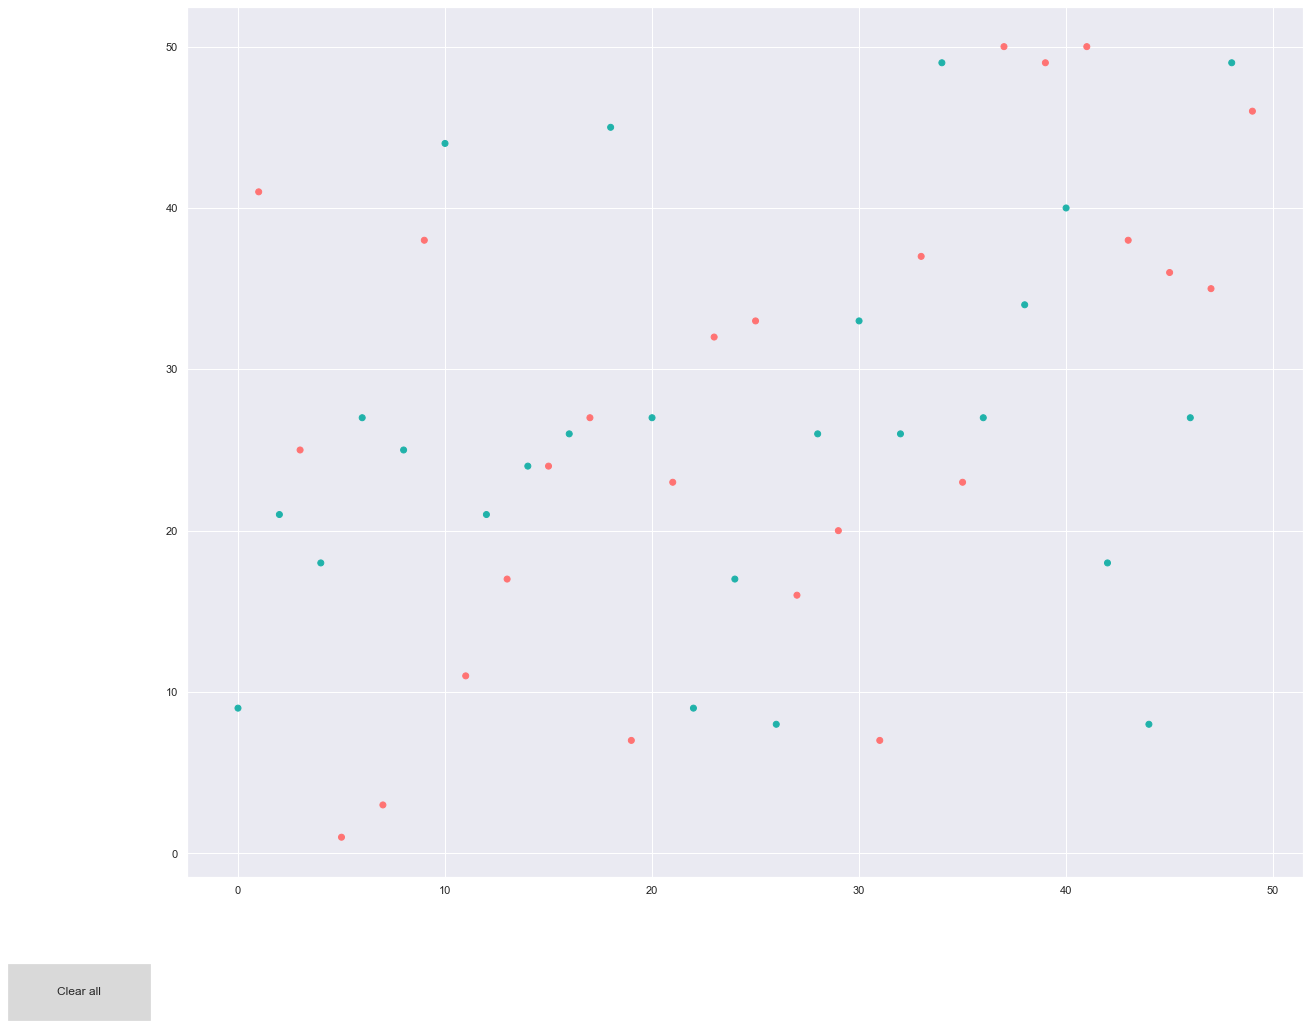

In [3]:
# import the random module since we will use it to generate the data
import random as rnd

# import the main drawing library
import matplotlib.pyplot as plt
from matplotlib.widgets import Button
from matplotlib.text import Annotation

# import the seaborn module which is based on matplotlib to make our visualization more presentable
import seaborn as sns

# set the default style
sns.set()

# define two colors, just to enrich the example
labels_color_map = {0: '#20b2aa', 1: '#ff7373'}

# set the examples count
no_examples = 50

# generate the data needed for the scatterplot
generated_data = [(x, rnd.randint(0, no_examples)) for x in range(0, no_examples)]
generated_labels = ["Label for instance #{0}".format(i) for i in range(0, no_examples)]

print("now visualizing scatterlplot...")

# add the values one by one to the scatterplot
instances_colors = []
axis_values_x = []
axis_values_y = []
for index, instance in enumerate(generated_data):
    # print instance, index, labels[index]
    coordinate_x, coordinate_y = instance
    color = labels_color_map[index % 2]

    instances_colors.append(color)
    axis_values_x.append(coordinate_x)
    axis_values_y.append(coordinate_y)

# draw a scatter-plot of the generated values
fig = plt.figure(figsize=(20, 16))
ax = plt.subplot()


# extract the scatterplot drawing in a separate function so we ca re-use the code
def draw_scatterplot():
    ax.scatter(
        axis_values_x,
        axis_values_y,
        c=instances_colors,
        picker=True
    )


# draw the initial scatterplot
draw_scatterplot()


# create and add an annotation object (a text label)
def annotate(axis, text, x, y):
    text_annotation = Annotation(text, xy=(x, y), xycoords='data')
    axis.add_artist(text_annotation)


# define the behaviour -> what happens when you pick a dot on the scatterplot by clicking close to it
def onpick(event):
    # step 1: take the index of the dot which was picked
    ind = event.ind

    # step 2: save the actual coordinates of the click, so we can position the text label properly
    label_pos_x = event.mouseevent.xdata
    label_pos_y = event.mouseevent.ydata

    # just in case two dots are very close, this offset will help the labels not appear one on top of each other
    offset = 0

    # if the dots are to close one to another, a list of dots clicked is returned by the matplotlib library
    for i in ind:
        # step 3: take the label for the corresponding instance of the data
        label = generated_labels[i]

        # step 4: log it for debugging purposes
        print("index", i, label)

        # step 5: create and add the text annotation to the scatterplot
        annotate(
            ax,
            label,
            label_pos_x + offset,
            label_pos_y + offset
        )

        # step 6: force re-draw
        ax.figure.canvas.draw_idle()

        # alter the offset just in case there are more than one dots affected by the click
        offset += 0.01


# connect the click handler function to the scatterplot
fig.canvas.mpl_connect('pick_event', onpick)

# create the "clear all" button, and place it somewhere on the screen
ax_clear_all = plt.axes([0.0, 0.0, 0.1, 0.05])
button_clear_all = Button(ax_clear_all, 'Clear all')


# define the "clear all" behaviour
def onclick(event):
    # step 1: we clear all artist object of the scatter plot
    ax.cla()

    # step 2: we re-populate the scatterplot only with the dots not the labels
    draw_scatterplot()

    # step 3: we force re-draw
    ax.figure.canvas.draw_idle()


# link the event handler function to the click event on the button
button_clear_all.on_clicked(onclick)

# initial drawing of the scatterplot
plt.plot()
print("scatterplot done")

# present the scatterplot
plt.show()